In [82]:

from subprocess import check_output
import os
input_folder = "../dataset"
 
###run once
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import graphviz
import pydotplus 
from sklearn import tree
from pandas import DataFrame,Series
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#print(os.environ["PATH"])

In [83]:
#movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_filled_values.csv")
movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_categ_num_only.csv")
#movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_no_vector_num_only.csv")
movie_data= DataFrame(movie_file)
movie_data = movie_data.drop('Unnamed: 0', axis=1)

#print(movie_data.isnull().sum())

movie_data.fillna(movie_data.mean(), inplace=True)

print(movie_data.isnull().sum())

#print(movie_data.iat[200,14])
#where(np.isnan(movie_data))
movie_data.head(10)


actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
blockbuster_month            0
cast_total_facebook_likes    0
director_facebook_likes      0
dump_month                   0
duration                     0
imdb_score                   0
movie_facebook_likes         0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
production_budget            0
title_year                   0
worldwide_gross              0
color_blackandwhite          0
color_color                  0
country_afghanistan          0
country_argentina            0
country_aruba                0
country_australia            0
country_austria              0
country_bahamas              0
country_belgium              0
country_brazil               0
country_bulgaria             0
country_canada               0
country_chile                0
country_china                0
                            ..
language_russian             0
language

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,imdb_score,movie_facebook_likes,...,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_tvy7,raiting_unrated,raiting_x
0,1000,942.0,862,1,4859,7000,0,178,7.8,34000,...,0,1,0,0,0,0,0,0,0,0
1,29000,14000.0,787,1,45239,7000,0,194,7.7,27000,...,0,1,0,0,0,0,0,0,0,0
2,3000,3000.0,878,1,8694,367,0,124,7.0,151000,...,0,1,0,0,0,0,0,0,0,0
3,26000,23000.0,14000,0,79155,0,0,140,7.2,95000,...,0,1,0,0,0,0,0,0,0,0
4,26000,21000.0,19000,0,97000,0,0,141,7.4,119000,...,0,1,0,0,0,0,0,0,0,0
5,10000,577.0,175,1,11064,0,0,130,7.3,46,...,0,1,0,0,0,0,0,0,0,0
6,1000,525.0,490,0,2601,69,0,102,7.5,58000,...,1,0,0,0,0,0,0,0,0,0
7,21000,3000.0,1000,0,25774,0,0,195,7.2,95000,...,0,1,0,0,0,0,0,0,0,0
8,7000,4000.0,1000,1,13636,22,0,91,6.4,71000,...,1,0,0,0,0,0,0,0,0,0
9,21000,19000.0,11000,0,66820,96,0,147,7.9,80000,...,0,1,0,0,0,0,0,0,0,0


In [84]:
#define predictors and predicted values
X = movie_data.drop(['worldwide_gross', 'title_year'], axis=1)
y = movie_data.worldwide_gross

from sklearn import preprocessing

####standardize data to address different scales.
standardized_X = preprocessing.scale(X)
standardized_y = preprocessing.scale(y)
#print(standardized_y)

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

###cannot prune tree; using 'max_depth' instead, that is if we want to indicate how far tree should go
reg_model = DecisionTreeRegressor()

##Train the model using the training sets 
reg_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [ ]:
####visualize tree
tree.export_graphviz(reg_model, out_file='imdb_tree.dot') 
from IPython.display import Image  
dot_data = tree.export_graphviz(reg_model, out_file=None, 
                                feature_names = X.columns, filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("imdb_tree.pdf") 
Image(graph.create_png())  

###Resultant tree graph scaled by by 0.15-0.17 to fit

In [45]:
#pred = reg_model.predict(X_test)
#plt.scatter(pred, y_test, label='worldwide_gross')
#plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlabel('pred')
#plt.ylabel('y_test')
#plt.show()

In [70]:
mean_squared_error(y_test, pred)

0.54451358357130408

In [71]:
r2_score(y_test, pred, multioutput='variance_weighted')

0.42830319693885238

In [72]:
#####cross validation
all_scores = []
best_score = -1
best_depth = 0

for i in range(1,9):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, standardized_X, standardized_y, cv=3, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    all_scores.append(current_score)
print all_scores
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

#plt.plot(range(1, 9), all_scores)
#plt.figure()
#plt.xlabel('x=max tree depth')


[0.9082595090402924, 0.89519983215822307, 0.86785435848649939, 0.84144508250647421, 0.81731615837573524, 0.81394960866442245, 0.82582392932825044, 0.82174957849622388]
Best score: 0.813949608664
Best depth: 6


In [73]:
#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

###cannot prune tree; using 'max_depth' instead, that is if we want to indicate how far tree should go
reg_model = DecisionTreeRegressor(max_depth=6)

##Train the model using the training sets 
reg_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [107]:
all_scores = []
best_score = -1
best_depth = 0

for i in range(1,9):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    crossvalidation = KFold(n=X.shape[0], n_folds=10,shuffle=True, random_state=1)
    scores = cross_val_score(tree_reg, standardized_X, standardized_y,
    scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1)
    
    #scores = cross_val_score(treereg, standardized_X, standardized_y, cv=3, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    
    
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    all_scores.append(current_score)
print all_scores
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth


#print scores
#print np.mean(np.abs(scores))

[0.9082595090402924, 0.89519983215822307, 0.86785435848649939, 0.84144508250647421, 0.81731615837573524, 0.81394960866442245, 0.82582392932825044, 0.82174957849622388]
Best score: 0.813949608664
Best depth: 6
[-3.14858234 -0.21539623 -0.05140025]
1.13845960665


In [75]:
pred = reg_model.predict(X_test)
mean_squared_error(y_test, pred) #######reduced error after cross-validation, using max-depth of 6

0.4307692800351709

In [77]:
reg_model.score(X_test, y_test)#######increased score after cross-validation, using max-depth of 6

0.54772584618027187

n 2 Important features(> 15 % of max importance):n Index([u'production_budget', u'num_voted_users'], dtype='object')
nFeatures sorted by importance (DESC):n Index([u'production_budget', u'num_voted_users'], dtype='object')


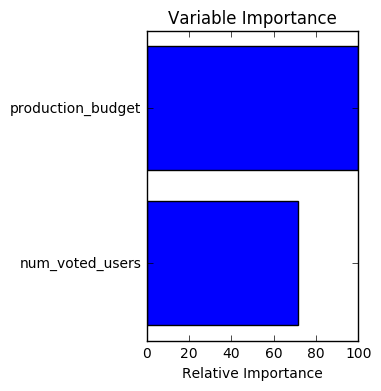

In [113]:
####Feature importance
feature_importance = reg_model.feature_importances_
 
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
 
# A threshold below which to drop features from the final data set. Specifically, this number represents
# the percentage of the most important feature's importance value
fi_threshold = 15
 
# Get the indexes of all features over the importance threshold
important_idx = np.where(feature_importance > fi_threshold)[0]
 
# Create a list of all the feature names above the importance threshold
important_features = X.columns[important_idx]
print "n", important_features.shape[0], "Important features(>", fi_threshold, "% of max importance):n",important_features
 
# Get the sorted indexes of important features
sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
print "nFeatures sorted by importance (DESC):n", important_features[sorted_idx]
 
# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], align='center')
plt.yticks(pos, important_features[sorted_idx[::-1]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.draw()
plt.show()

In [78]:
X = movie_data[['production_budget','num_voted_users']]
y = movie_data.worldwide_gross

from sklearn import preprocessing

####standardize data to address different scales.
standardized_X = preprocessing.scale(X)
standardized_y = preprocessing.scale(y)
#print(standardized_y)

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

###cannot prune tree; using 'max_depth' instead, that is if we want to indicate how far tree should go
reg_model = DecisionTreeRegressor(max_depth=6)

##Train the model using the training sets 
reg_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

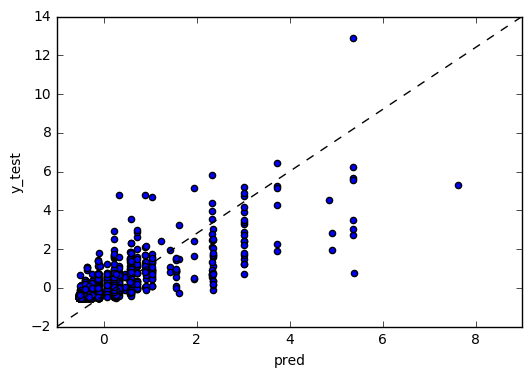

In [79]:
pred = reg_model.predict(X_test)
plt.scatter(pred, y_test, label='worldwide_gross')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [80]:
mean_squared_error(y_test, pred) ###reduced error after feature importance

0.35058928642203929

In [81]:
r2_score(y_test, pred, multioutput='variance_weighted') ###increased error after feature importance

0.63190858725616639